<a href="https://colab.research.google.com/github/sashank-sai/DiabeticsRetenopathyDetection/blob/main/AssignmentIITH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tanjemahamed/odir5k-classification")

print("Path to dataset files:", path)

100%|██████████| 374M/374M [00:09<00:00, 40.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/tanjemahamed/odir5k-classification/versions/1


In [ ]:
import kagglehub
import os
import shutil
from pathlib import Path

# Download latest version of the dataset
path = kagglehub.dataset_download("tanjemahamed/odir5k-classification")
print("Path to dataset files:", path)

# Inspect directory contents to confirm structure
print("Dataset directory contents:", os.listdir(path))

# Check the 'datasets' subdirectory
sub_dir = os.path.join(path, "datasets")
print("Contents of 'datasets' subdirectory:", os.listdir(sub_dir))

# Define paths to Normal and Diabetes image folders
normal_dir = os.path.join(sub_dir, "normal")
diabetes_dir = os.path.join(sub_dir, "diabetes")

# Verify paths exist
print("Normal directory exists:", os.path.exists(normal_dir))
print("Diabetes directory exists:", os.path.exists(diabetes_dir))

# Output directory for selected images
output_dir = "./dataset"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, "Normal"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "Diabetes"), exist_ok=True)

# Get list of images
normal_images = os.listdir(normal_dir)[:1000]  # Select up to 1000 images
diabetes_images = os.listdir(diabetes_dir)[:1000]  # Select up to 1000 images

# Copy Normal images
for img in normal_images:
    src = os.path.join(normal_dir, img)
    dst = os.path.join(output_dir, "Normal", img)
    if os.path.exists(src):
        shutil.copy(src, dst)
    else:
        print(f"Image not found: {src}")

# Copy Diabetes images
for img in diabetes_images:
    src = os.path.join(diabetes_dir, img)
    dst = os.path.join(output_dir, "Diabetes", img)
    if os.path.exists(src):
        shutil.copy(src, dst)
    else:
        print(f"Image not found: {src}")

# Print the number of images copied
print(f"Normal images copied: {len(os.listdir(os.path.join(output_dir, 'Normal')))}")
print(f"Diabetes images copied: {len(os.listdir(os.path.join(output_dir, 'Diabetes')))}")

Path to dataset files: /root/.cache/kagglehub/datasets/tanjemahamed/odir5k-classification/versions/1
Dataset directory contents: ['datasets']
Contents of 'datasets' subdirectory: ['hypertension', 'ageDegeneration', 'normal', 'glaucoma', 'cataract', 'others', 'diabetes', 'myopia']
Normal directory exists: True
Diabetes directory exists: True
Normal images copied: 1000
Diabetes images copied: 1000


Path to dataset files: /kaggle/input/odir5k-classification
Normal directory exists: True
Diabetes directory exists: True
Normal images copied: 1000
Diabetes images copied: 1000
Found 1400 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 38s 624ms/step - accuracy: 0.5495 - loss: 0.8341 - val_accuracy: 0.5967 - val_loss: 0.6698
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 451ms/step - accuracy: 0.6001 - loss: 0.6494 - val_accuracy: 0.6733 - val_loss: 0.6133
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 18s 407ms/step - accuracy: 0.6357 - loss: 0.6282 - val_accuracy: 0.6767 - val_loss: 0.6152
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 430ms/step - accuracy: 0.6407 - loss: 0.6403 - val_accuracy: 0.6800 - val_loss: 0.5983
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 18s 408ms/step - accuracy: 0.6410 - loss: 0.6198 - val_accuracy: 0.6333 - val_loss: 0.6412
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 430ms/step - accuracy: 0.6617 - loss: 0.6229 - val_accuracy: 0.6000 - val_loss: 0.6459
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 18s 406ms/step - accuracy: 0.6417 - loss: 0.6430 - val_accuracy: 0.6767 - val_loss: 0.6106
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 437ms/step - accuracy: 0.6427 - loss: 0.6044 - val_accu

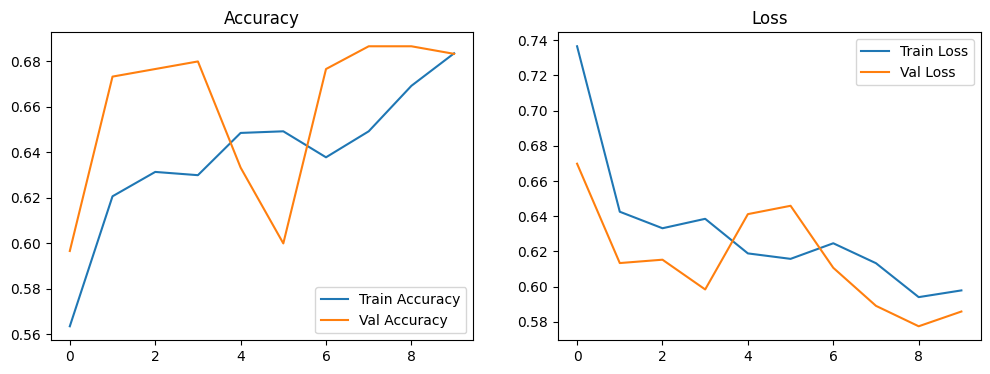

In [ ]:
import kagglehub
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Download dataset
path = kagglehub.dataset_download("tanjemahamed/odir5k-classification")
print("Path to dataset files:", path)

# Define paths
sub_dir = os.path.join(path, "datasets")
normal_dir = os.path.join(sub_dir, "normal")
diabetes_dir = os.path.join(sub_dir, "diabetes")

# Verify directories
print("Normal directory exists:", os.path.exists(normal_dir))
print("Diabetes directory exists:", os.path.exists(diabetes_dir))

# Output directory for dataset
output_dir = "./dataset"
os.makedirs(os.path.join(output_dir, "Normal"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "Diabetes"), exist_ok=True)

# Get image lists (up to 1000 per class)
normal_images = os.listdir(normal_dir)[:1000]
diabetes_images = os.listdir(diabetes_dir)[:1000]

# Copy images
for img in normal_images:
    src = os.path.join(normal_dir, img)
    dst = os.path.join(output_dir, "Normal", img)
    if os.path.exists(src):
        shutil.copy(src, dst)

for img in diabetes_images:
    src = os.path.join(diabetes_dir, img)
    dst = os.path.join(output_dir, "Diabetes", img)
    if os.path.exists(src):
        shutil.copy(src, dst)

print(f"Normal images copied: {len(os.listdir(os.path.join(output_dir, 'Normal')))}")
print(f"Diabetes images copied: {len(os.listdir(os.path.join(output_dir, 'Diabetes')))}")

# Prepare data for splitting
normal_files = [os.path.join(output_dir, "Normal", img) for img in os.listdir(os.path.join(output_dir, "Normal"))]
diabetes_files = [os.path.join(output_dir, "Diabetes", img) for img in os.listdir(os.path.join(output_dir, "Diabetes"))]

# Labels: 0 for Normal, 1 for Diabetes
normal_labels = [0] * len(normal_files)
diabetes_labels = [1] * len(diabetes_files)

# Combine data
all_files = normal_files + diabetes_files
all_labels = normal_labels + diabetes_labels

# Split into train (70%), validation (15%), test (15%)
train_files, temp_files, train_labels, temp_labels = train_test_split(
    all_files, all_labels, test_size=0.3, stratify=all_labels, random_state=42
)
val_files, test_files, val_labels, test_labels = train_test_split(
    temp_files, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42
)

# Create directories for train, val, test
for split in ["train", "val", "test"]:
    for cls in ["Normal", "Diabetes"]:
        os.makedirs(os.path.join(output_dir, split, cls), exist_ok=True)

# Move files to respective directories
def move_files(files, labels, split):
    for file, label in zip(files, labels):
        cls = "Normal" if label == 0 else "Diabetes"
        dst = os.path.join(output_dir, split, cls, os.path.basename(file))
        shutil.move(file, dst)

move_files(train_files, train_labels, "train")
move_files(val_files, val_labels, "val")
move_files(test_files, test_labels, "test")

# Data augmentation and preprocessing
IMG_SIZE = 224  # MobileNetV2 input size
BATCH_SIZE = 32

# Training data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation and test data (only rescaling)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    os.path.join(output_dir, "train"),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    os.path.join(output_dir, "val"),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    os.path.join(output_dir, "test"),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

# Build MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze base model

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
EPOCHS = 10
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 386ms/step
Accuracy: 0.5867
Precision: 0.5537
Recall: 0.8933
F1 Score: 0.6837
Sensitivity: 0.8933
Specificity: 0.2800
AUC Score: 0.7089


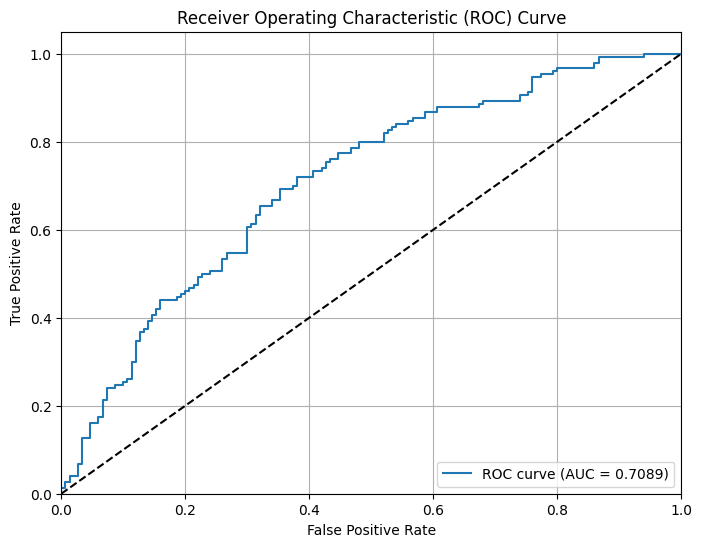

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# Evaluate model on test set
y_true = test_generator.classes  # True labels
y_pred_prob = model.predict(test_generator).flatten()  # Predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Binary predictions

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Confusion matrix for sensitivity and specificity
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve.png')
plt.show()

Path to dataset files: /kaggle/input/odir5k-classification
Normal directory exists: True
Diabetes directory exists: True
Normal images copied: 1000
Diabetes images copied: 1000
Found 1400 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 38s 600ms/step - accuracy: 0.5802 - loss: 0.7353 - val_accuracy: 0.6167 - val_loss: 0.6320
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 427ms/step - accuracy: 0.6215 - loss: 0.6478 - val_accuracy: 0.6000 - val_loss: 0.6349
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 18s 407ms/step - accuracy: 0.6478 - loss: 0.6292 - val_accuracy: 0.6867 - val_loss: 0.6108
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 423ms/step - accuracy: 0.6655 - loss: 0.5863 - val_accuracy: 0.6600 - val_loss: 0.6152
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 429ms/step - accuracy: 0.6591 - loss: 0.6027 - val_accuracy: 0.5767 - val_loss: 0.7200
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 431ms/step - accuracy: 0.6305 - loss: 0.6367 - val_accuracy: 0.7100 - val_loss: 0.6051
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 18s 413ms/step - accuracy: 0.6375 - loss: 0.6054 - val_accuracy: 0.6300 - val_loss: 0.6063
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 433ms/step - accuracy: 0.6754 - loss: 0.5962 - val_accu

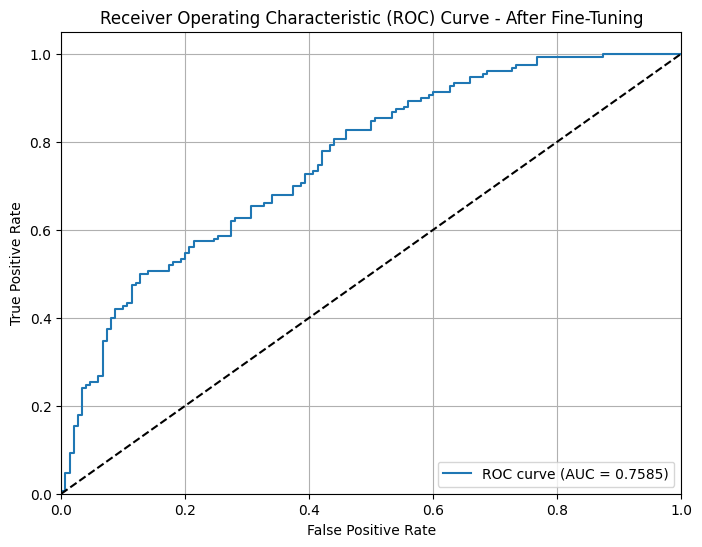

In [ ]:
import kagglehub
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Download dataset
path = kagglehub.dataset_download("tanjemahamed/odir5k-classification")
print("Path to dataset files:", path)

# Define paths
sub_dir = os.path.join(path, "datasets")
normal_dir = os.path.join(sub_dir, "normal")
diabetes_dir = os.path.join(sub_dir, "diabetes")

# Verify directories
print("Normal directory exists:", os.path.exists(normal_dir))
print("Diabetes directory exists:", os.path.exists(diabetes_dir))

# Output directory for dataset
output_dir = "./dataset"
os.makedirs(os.path.join(output_dir, "Normal"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "Diabetes"), exist_ok=True)

# Get image lists (up to 1000 per class)
normal_images = os.listdir(normal_dir)[:1000]
diabetes_images = os.listdir(diabetes_dir)[:1000]

# Copy images
for img in normal_images:
    src = os.path.join(normal_dir, img)
    dst = os.path.join(output_dir, "Normal", img)
    if os.path.exists(src):
        shutil.copy(src, dst)

for img in diabetes_images:
    src = os.path.join(diabetes_dir, img)
    dst = os.path.join(output_dir, "Diabetes", img)
    if os.path.exists(src):
        shutil.copy(src, dst)

print(f"Normal images copied: {len(os.listdir(os.path.join(output_dir, 'Normal')))}")
print(f"Diabetes images copied: {len(os.listdir(os.path.join(output_dir, 'Diabetes')))}")

# Prepare data for splitting
normal_files = [os.path.join(output_dir, "Normal", img) for img in os.listdir(os.path.join(output_dir, "Normal"))]
diabetes_files = [os.path.join(output_dir, "Diabetes", img) for img in os.listdir(os.path.join(output_dir, "Diabetes"))]

# Labels: 0 for Normal, 1 for Diabetes
normal_labels = [0] * len(normal_files)
diabetes_labels = [1] * len(diabetes_files)

# Combine data
all_files = normal_files + diabetes_files
all_labels = normal_labels + diabetes_labels

# Split into train (70%), validation (15%), test (15%)
train_files, temp_files, train_labels, temp_labels = train_test_split(
    all_files, all_labels, test_size=0.3, stratify=all_labels, random_state=42
)
val_files, test_files, val_labels, test_labels = train_test_split(
    temp_files, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42
)

# Create directories for train, val, test
for split in ["train", "val", "test"]:
    for cls in ["Normal", "Diabetes"]:
        os.makedirs(os.path.join(output_dir, split, cls), exist_ok=True)

# Move files to respective directories
def move_files(files, labels, split):
    for file, label in zip(files, labels):
        cls = "Normal" if label == 0 else "Diabetes"
        dst = os.path.join(output_dir, split, cls, os.path.basename(file))
        shutil.move(file, dst)

move_files(train_files, train_labels, "train")
move_files(val_files, val_labels, "val")
move_files(test_files, test_labels, "test")

# Data augmentation and preprocessing
IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(output_dir, "train"),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    os.path.join(output_dir, "val"),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    os.path.join(output_dir, "test"),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

# Build MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Initial training with frozen layers
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
EPOCHS = 10
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Evaluate before fine-tuning
print("Evaluation before fine-tuning:")
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC Score: {roc_auc:.4f}")

# Fine-tuning
# Unfreeze the top layers of MobileNetV2 (last 20 layers)
base_model.trainable = True
fine_tune_at = 100  # Start fine-tuning after this layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Fine-tune for additional epochs
FINE_TUNE_EPOCHS = 5
history_fine = model.fit(
    train_generator,
    epochs=FINE_TUNE_EPOCHS,
    validation_data=val_generator
)

# Evaluate after fine-tuning
print("\nEvaluation after fine-tuning:")
y_pred_prob_fine = model.predict(test_generator).flatten()
y_pred_fine = (y_pred_prob_fine > 0.5).astype(int)

accuracy_fine = accuracy_score(y_true, y_pred_fine)
precision_fine = precision_score(y_true, y_pred_fine)
recall_fine = recall_score(y_true, y_pred_fine)
f1_fine = f1_score(y_true, y_pred_fine)
tn_fine, fp_fine, fn_fine, tp_fine = confusion_matrix(y_true, y_pred_fine).ravel()
sensitivity_fine = tp_fine / (tp_fine + fn_fine)
specificity_fine = tn_fine / (tn_fine + fp_fine)
fpr_fine, tpr_fine, _ = roc_curve(y_true, y_pred_prob_fine)
roc_auc_fine = auc(fpr_fine, tpr_fine)

print(f"Accuracy: {accuracy_fine:.4f}")
print(f"Precision: {precision_fine:.4f}")
print(f"Recall: {recall_fine:.4f}")
print(f"F1 Score: {f1_fine:.4f}")
print(f"Sensitivity: {sensitivity_fine:.4f}")
print(f"Specificity: {specificity_fine:.4f}")
print(f"AUC Score: {roc_auc_fine:.4f}")

# Plot ROC Curve after fine-tuning
plt.figure(figsize=(8, 6))
plt.plot(fpr_fine, tpr_fine, label=f'ROC curve (AUC = {roc_auc_fine:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - After Fine-Tuning')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve_finetune.png')
plt.show()

Path to dataset files: /kaggle/input/odir5k-classification
Normal directory exists: True
Diabetes directory exists: True
Normal images copied: 1664
Diabetes images copied: 1392
Images in test/Normal: 250
Images in test/Diabetes: 209
Found 2139 images belonging to 2 classes.
Found 458 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 48s 566ms/step - accuracy: 0.5752 - loss: 0.7134 - val_accuracy: 0.6659 - val_loss: 0.6329
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 28s 425ms/step - accuracy: 0.6244 - loss: 0.6397 - val_accuracy: 0.6725 - val_loss: 0.6151
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 29s 427ms/step - accuracy: 0.6471 - loss: 0.6192 - val_accuracy: 0.6659 - val_loss: 0.6075
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 29s 422ms/step - accuracy: 0.6773 - loss: 0.6047 - val_accuracy: 0.6310 - val_loss: 0.6217
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 28s 420ms/step - accuracy: 0.6786 - loss: 0.5857 - val_accuracy: 0.6703 - val_loss: 0.6088
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 29s 426ms/step - accuracy: 0.6792 - loss: 0.5873 - val_accuracy: 0.6354 - val_loss: 0.6299
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 29s 433ms/step - accuracy: 0.6813 - loss: 0.5775 - val_accuracy: 0.6463 - val_loss: 0.6193
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 27s 409ms/step - accuracy: 0.6708 - loss: 0.5805 - val_accu

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_314']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


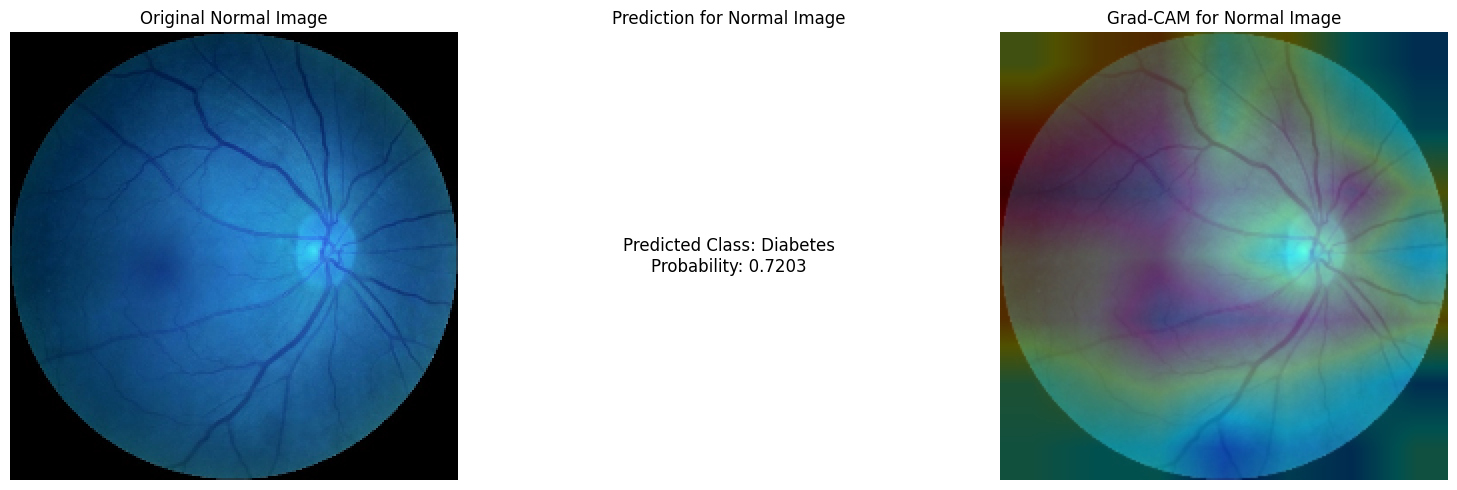

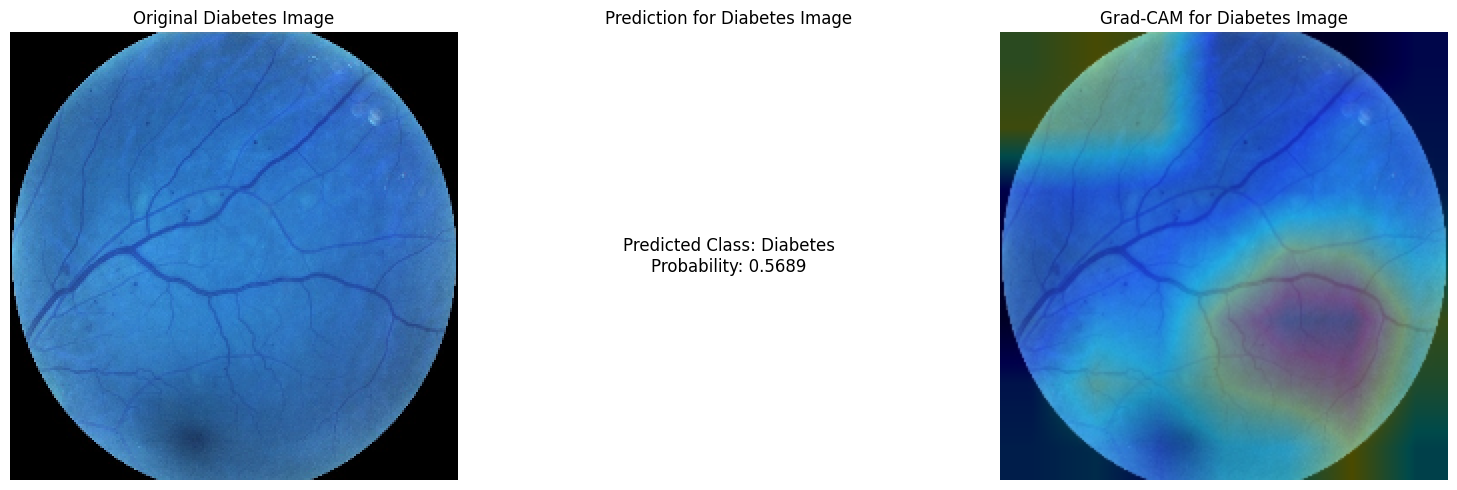

Interpretation:
- For the Normal image: The Grad-CAM heatmap highlights regions influencing the prediction. If it focuses on the background or irrelevant areas, the model might be overfitting or missing key features.
- For the Diabetes image: The heatmap should highlight retinal features (e.g., blood vessels, lesions) if the model is learning disease-specific patterns. If it focuses elsewhere, retraining may be needed.


In [ ]:
import kagglehub
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import cv2

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Download dataset
path = kagglehub.dataset_download("tanjemahamed/odir5k-classification")
print("Path to dataset files:", path)

# Define paths
sub_dir = os.path.join(path, "datasets")
normal_dir = os.path.join(sub_dir, "normal")
diabetes_dir = os.path.join(sub_dir, "diabetes")

# Verify directories
print("Normal directory exists:", os.path.exists(normal_dir))
print("Diabetes directory exists:", os.path.exists(diabetes_dir))

# Output directory for dataset
output_dir = "./dataset"
os.makedirs(os.path.join(output_dir, "Normal"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "Diabetes"), exist_ok=True)

# Get image lists (up to 1000 per class)
normal_images = os.listdir(normal_dir)[:1000]
diabetes_images = os.listdir(diabetes_dir)[:1000]

# Copy images
for img in normal_images:
    src = os.path.join(normal_dir, img)
    dst = os.path.join(output_dir, "Normal", img)
    if os.path.exists(src):
        shutil.copy(src, dst)

for img in diabetes_images:
    src = os.path.join(diabetes_dir, img)
    dst = os.path.join(output_dir, "Diabetes", img)
    if os.path.exists(src):
        shutil.copy(src, dst)

print(f"Normal images copied: {len(os.listdir(os.path.join(output_dir, 'Normal')))}")
print(f"Diabetes images copied: {len(os.listdir(os.path.join(output_dir, 'Diabetes')))}")

# Prepare data for splitting
normal_files = [os.path.join(output_dir, "Normal", img) for img in os.listdir(os.path.join(output_dir, "Normal"))]
diabetes_files = [os.path.join(output_dir, "Diabetes", img) for img in os.listdir(os.path.join(output_dir, "Diabetes"))]

# Labels: 0 for Normal, 1 for Diabetes
normal_labels = [0] * len(normal_files)
diabetes_labels = [1] * len(diabetes_files)

# Combine data
all_files = normal_files + diabetes_files
all_labels = normal_labels + diabetes_labels

# Split into train (70%), validation (15%), test (15%)
train_files, temp_files, train_labels, temp_labels = train_test_split(
    all_files, all_labels, test_size=0.3, stratify=all_labels, random_state=42
)
val_files, test_files, val_labels, test_labels = train_test_split(
    temp_files, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42
)

# Create directories for train, val, test
for split in ["train", "val", "test"]:
    for cls in ["Normal", "Diabetes"]:
        os.makedirs(os.path.join(output_dir, split, cls), exist_ok=True)

# Move files to respective directories
def move_files(files, labels, split):
    for file, label in zip(files, labels):
        cls = "Normal" if label == 0 else "Diabetes"
        dst = os.path.join(output_dir, split, cls, os.path.basename(file))
        shutil.move(file, dst)

move_files(train_files, train_labels, "train")
move_files(val_files, val_labels, "val")
move_files(test_files, test_labels, "test")

print(f"Images in test/Normal: {len(os.listdir(os.path.join(output_dir, 'test', 'Normal')))}")
print(f"Images in test/Diabetes: {len(os.listdir(os.path.join(output_dir, 'test', 'Diabetes')))}")

# Rebuild model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Initial training with frozen layers
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(output_dir, "train"),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)
val_generator = val_test_datagen.flow_from_directory(
    os.path.join(output_dir, "val"),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

EPOCHS = 10
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Fine-tuning (as done previously)
base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
FINE_TUNE_EPOCHS = 5
history_fine = model.fit(
    train_generator,
    epochs=FINE_TUNE_EPOCHS,
    validation_data=val_generator
)

# Define Grad-CAM function
def get_gradcam(model, img_array, last_conv_layer_name='Conv_1', class_idx=None):
    last_conv_layer = model.get_layer(last_conv_layer_name)
    grad_model = tf.keras.models.Model(
        [model.inputs], [last_conv_layer.output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if class_idx is None:
            class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap, axis=-1)
    heatmap = tf.nn.relu(heatmap)
    heatmap /= tf.reduce_max(heatmap)

    return heatmap.numpy()

# Load and preprocess test images
test_dir = './dataset/test'
normal_dir = os.path.join(test_dir, 'Normal')
diabetes_dir = os.path.join(test_dir, 'Diabetes')

# Select one sample image from each class
normal_img_path = os.path.join(normal_dir, os.listdir(normal_dir)[0])
diabetes_img_path = os.path.join(diabetes_dir, os.listdir(diabetes_dir)[0])

def preprocess_image(img_path):
    img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

normal_img = preprocess_image(normal_img_path)
diabetes_img = preprocess_image(diabetes_img_path)

# Get predictions
normal_pred_prob = model.predict(normal_img)[0][0]
diabetes_pred_prob = model.predict(diabetes_img)[0][0]

# Map probabilities to class labels (0: Normal, 1: Diabetes)
normal_pred_class = 'Normal' if normal_pred_prob < 0.5 else 'Diabetes'
diabetes_pred_class = 'Normal' if diabetes_pred_prob < 0.5 else 'Diabetes'

# Generate Grad-CAM heatmaps
heatmap_normal = get_gradcam(model, normal_img, last_conv_layer_name='Conv_1')
heatmap_diabetes = get_gradcam(model, diabetes_img, last_conv_layer_name='Conv_1')

# Overlay heatmaps on original images
def overlay_heatmap(img, heatmap, alpha=0.4):
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    return superimposed_img / np.max(superimposed_img)

normal_img_orig = cv2.imread(normal_img_path)
diabetes_img_orig = cv2.imread(diabetes_img_path)
superimposed_normal = overlay_heatmap(normal_img_orig, heatmap_normal)
superimposed_diabetes = overlay_heatmap(diabetes_img_orig, heatmap_diabetes)

# Display results
plt.figure(figsize=(15, 5))

# Normal Image Row
plt.subplot(1, 3, 1)
plt.imshow(normal_img_orig[:, :, ::-1])
plt.title('Original Normal Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.text(0.5, 0.5, f'Predicted Class: {normal_pred_class}\nProbability: {normal_pred_prob:.4f}',
         ha='center', va='center', fontsize=12)
plt.title('Prediction for Normal Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(superimposed_normal[:, :, ::-1])
plt.title('Grad-CAM for Normal Image')
plt.axis('off')

plt.tight_layout()
plt.savefig('gradcam_normal.png')
plt.show()

# Diabetes Image Row
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(diabetes_img_orig[:, :, ::-1])
plt.title('Original Diabetes Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.text(0.5, 0.5, f'Predicted Class: {diabetes_pred_class}\nProbability: {diabetes_pred_prob:.4f}',
         ha='center', va='center', fontsize=12)
plt.title('Prediction for Diabetes Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(superimposed_diabetes[:, :, ::-1])
plt.title('Grad-CAM for Diabetes Image')
plt.axis('off')

plt.tight_layout()
plt.savefig('gradcam_diabetes.png')
plt.show()

# Interpretations
print("Interpretation:")
print("- For the Normal image: The Grad-CAM heatmap highlights regions influencing the prediction. If it focuses on the background or irrelevant areas, the model might be overfitting or missing key features.")
print("- For the Diabetes image: The heatmap should highlight retinal features (e.g., blood vessels, lesions) if the model is learning disease-specific patterns. If it focuses elsewhere, retraining may be needed.")

In [ ]:
import kagglehub
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import cv2

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Download dataset
path = kagglehub.dataset_download("tanjemahamed/odir5k-classification")
print("Path to dataset files:", path)

# Define paths
sub_dir = os.path.join(path, "datasets")
normal_dir = os.path.join(sub_dir, "normal")
diabetes_dir = os.path.join(sub_dir, "diabetes")

# Verify directories
print("Normal directory exists:", os.path.exists(normal_dir))
print("Diabetes directory exists:", os.path.exists(diabetes_dir))

# Output directory for dataset
output_dir = "./dataset"
os.makedirs(os.path.join(output_dir, "Normal"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "Diabetes"), exist_ok=True)

# Get image lists (up to 1000 per class)
normal_images = os.listdir(normal_dir)[:1000]
diabetes_images = os.listdir(diabetes_dir)[:1000]

# Copy images
for img in normal_images:
    src = os.path.join(normal_dir, img)
    dst = os.path.join(output_dir, "Normal", img)
    if os.path.exists(src):
        shutil.copy(src, dst)

for img in diabetes_images:
    src = os.path.join(diabetes_dir, img)
    dst = os.path.join(output_dir, "Diabetes", img)
    if os.path.exists(src):
        shutil.copy(src, dst)

print(f"Normal images copied: {len(os.listdir(os.path.join(output_dir, 'Normal')))}")
print(f"Diabetes images copied: {len(os.listdir(os.path.join(output_dir, 'Diabetes')))}")

# Prepare data for splitting
normal_files = [os.path.join(output_dir, "Normal", img) for img in os.listdir(os.path.join(output_dir, "Normal"))]
diabetes_files = [os.path.join(output_dir, "Diabetes", img) for img in os.listdir(os.path.join(output_dir, "Diabetes"))]

# Labels: 0 for Normal, 1 for Diabetes
normal_labels = [0] * len(normal_files)
diabetes_labels = [1] * len(diabetes_files)

# Combine data
all_files = normal_files + diabetes_files
all_labels = normal_labels + diabetes_labels

# Split into train (70%), validation (15%), test (15%)
train_files, temp_files, train_labels, temp_labels = train_test_split(
    all_files, all_labels, test_size=0.3, stratify=all_labels, random_state=42
)
val_files, test_files, val_labels, test_labels = train_test_split(
    temp_files, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42
)

# Create directories for train, val, test
for split in ["train", "val", "test"]:
    for cls in ["Normal", "Diabetes"]:
        os.makedirs(os.path.join(output_dir, split, cls), exist_ok=True)

# Move files to respective directories
def move_files(files, labels, split):
    for file, label in zip(files, labels):
        cls = "Normal" if label == 0 else "Diabetes"
        dst = os.path.join(output_dir, split, cls, os.path.basename(file))
        shutil.move(file, dst)

move_files(train_files, train_labels, "train")
move_files(val_files, val_labels, "val")
move_files(test_files, test_labels, "test")

print(f"Images in test/Normal: {len(os.listdir(os.path.join(output_dir, 'test', 'Normal')))}")
print(f"Images in test/Diabetes: {len(os.listdir(os.path.join(output_dir, 'test', 'Diabetes')))}")

# Rebuild model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Initial training with frozen layers
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(output_dir, "train"),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)
val_generator = val_test_datagen.flow_from_directory(
    os.path.join(output_dir, "val"),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

EPOCHS = 10
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Fine-tuning
base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
FINE_TUNE_EPOCHS = 5
history_fine = model.fit(
    train_generator,
    epochs=FINE_TUNE_EPOCHS,
    validation_data=val_generator
)

# Save the model after fine-tuning
# Option 1: Save the entire model (architecture + weights)
model.save('diabetic_retinopathy_model.h5')
print("Entire model saved as 'diabetic_retinopathy_model.h5'")

# Option 2: Save only the weights (if you want to load them into the same architecture later)
model.save_weights('diabetic_retinopathy_weights.h5')
print("Model weights saved as 'diabetic_retinopathy_weights.h5'")

# Define Grad-CAM function
def get_gradcam(model, img_array, last_conv_layer_name='Conv_1', class_idx=None):
    last_conv_layer = model.get_layer(last_conv_layer_name)
    grad_model = tf.keras.models.Model(
        [model.inputs], [last_conv_layer.output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if class_idx is None:
            class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap, axis=-1)
    heatmap = tf.nn.relu(heatmap)
    heatmap /= tf.reduce_max(heatmap)

    return heatmap.numpy()

# Load and preprocess test images
test_dir = './dataset/test'
normal_dir = os.path.join(test_dir, 'Normal')
diabetes_dir = os.path.join(test_dir, 'Diabetes')

# Select one sample image from each class
normal_img_path = os.path.join(normal_dir, os.listdir(normal_dir)[0])
diabetes_img_path = os.path.join(diabetes_dir, os.listdir(diabetes_dir)[0])

def preprocess_image(img_path):
    img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

normal_img = preprocess_image(normal_img_path)
diabetes_img = preprocess_image(diabetes_img_path)

# Get predictions
normal_pred_prob = model.predict(normal_img)[0][0]
diabetes_pred_prob = model.predict(diabetes_img)[0][0]

# Map probabilities to class labels (0: Normal, 1: Diabetes)
normal_pred_class = 'Normal' if normal_pred_prob < 0.5 else 'Diabetes'
diabetes_pred_class = 'Normal' if diabetes_pred_prob < 0.5 else 'Diabetes'

# Generate Grad-CAM heatmaps
heatmap_normal = get_gradcam(model, normal_img, last_conv_layer_name='Conv_1')
heatmap_diabetes = get_gradcam(model, diabetes_img, last_conv_layer_name='Conv_1')

# Overlay heatmaps on original images
def overlay_heatmap(img, heatmap, alpha=0.4):
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    return superimposed_img / np.max(superimposed_img)

normal_img_orig = cv2.imread(normal_img_path)
diabetes_img_orig = cv2.imread(diabetes_img_path)
superimposed_normal = overlay_heatmap(normal_img_orig, heatmap_normal)
superimposed_diabetes = overlay_heatmap(diabetes_img_orig, heatmap_diabetes)

# Display results
plt.figure(figsize=(15, 5))

# Normal Image Row
plt.subplot(1, 3, 1)
plt.imshow(normal_img_orig[:, :, ::-1])
plt.title('Original Normal Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.text(0.5, 0.5, f'Predicted Class: {normal_pred_class}\nProbability: {normal_pred_prob:.4f}',
         ha='center', va='center', fontsize=12)
plt.title('Prediction for Normal Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(superimposed_normal[:, :, ::-1])
plt.title('Grad-CAM for Normal Image')
plt.axis('off')

plt.tight_layout()
plt.savefig('gradcam_normal.png')
plt.show()

# Diabetes Image Row
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(diabetes_img_orig[:, :, ::-1])
plt.title('Original Diabetes Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.text(0.5, 0.5, f'Predicted Class: {diabetes_pred_class}\nProbability: {diabetes_pred_prob:.4f}',
         ha='center', va='center', fontsize=12)
plt.title('Prediction for Diabetes Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(superimposed_diabetes[:, :, ::-1])
plt.title('Grad-CAM for Diabetes Image')
plt.axis('off')

plt.tight_layout()
plt.savefig('gradcam_diabetes.png')
plt.show()

# Interpretations
print("Interpretation:")
print("- For the Normal image: The Grad-CAM heatmap highlights regions influencing the prediction. If it focuses on the background or irrelevant areas, the model might be overfitting or missing key features.")
print("- For the Diabetes image: The heatmap should highlight retinal features (e.g., blood vessels, lesions) if the model is learning disease-specific patterns. If it focuses elsewhere, retraining may be needed.")

Path to dataset files: /kaggle/input/odir5k-classification
Normal directory exists: True
Diabetes directory exists: True
Normal images copied: 1000
Diabetes images copied: 1000
Images in test/Normal: 371
Images in test/Diabetes: 333
Found 2555 images belonging to 2 classes.
Found 710 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 52s 568ms/step - accuracy: 0.5600 - loss: 0.7458 - val_accuracy: 0.6014 - val_loss: 0.6459
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 34s 420ms/step - accuracy: 0.6427 - loss: 0.6325 - val_accuracy: 0.6676 - val_loss: 0.6058
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 33s 415ms/step - accuracy: 0.6411 - loss: 0.6248 - val_accuracy: 0.6845 - val_loss: 0.5895
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 34s 421ms/step - accuracy: 0.6325 - loss: 0.6272 - val_accuracy: 0.6901 - val_loss: 0.5829
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 34s 423ms/step - accuracy: 0.6739 - loss: 0.5865 - val_accuracy: 0.6268 - val_loss: 0.6215
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 34s 431ms/step - accuracy: 0.6688 - loss: 0.5966 - val_accuracy: 0.6761 - val_loss: 0.5958
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 33s 408ms/step - accuracy: 0.6774 - loss: 0.5888 - val_accuracy: 0.6873 - val_loss: 0.5877
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 34s 423ms/step - accuracy: 0.6825 - loss: 0.5864 - val_accu

Entire model saved as 'diabetic_retinopathy_model.h5'


ValueError: The filename must end in `.weights.h5`. Received: filepath=diabetic_retinopathy_weights.h5

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_1256']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


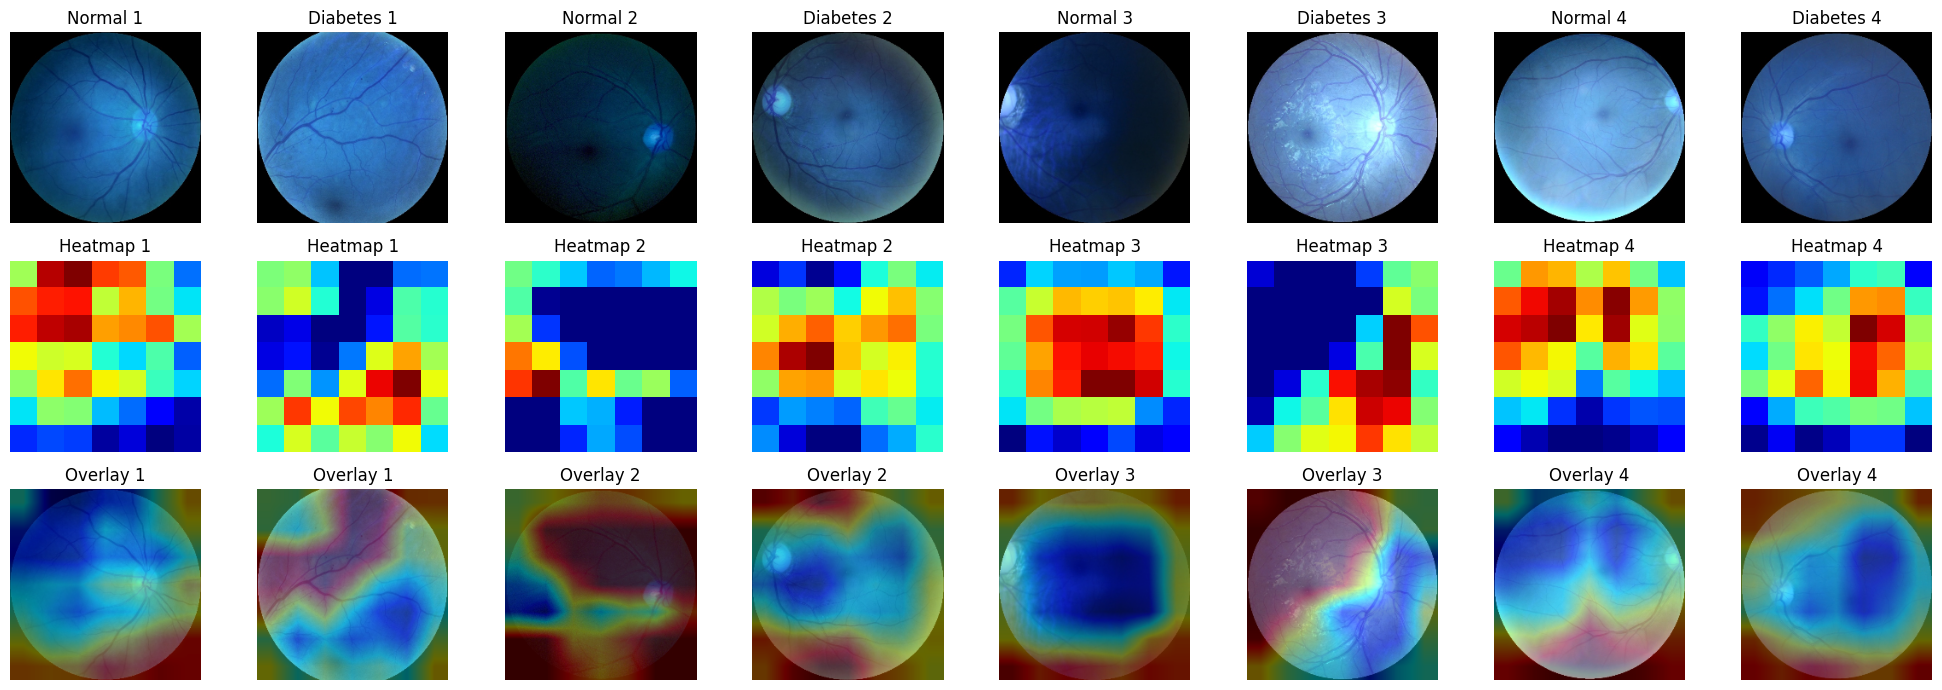

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Load the pre-trained model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.load_weights('/content/diabetic_retinopathy_model.h5')  # Update with actual path

# Define Grad-CAM function
def get_gradcam(model, img_array, last_conv_layer_name='Conv_1'):
    last_conv_layer = model.get_layer(last_conv_layer_name)
    grad_model = Model([model.inputs], [last_conv_layer.output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap, axis=-1)
    heatmap = tf.nn.relu(heatmap)
    heatmap /= tf.reduce_max(heatmap)
    return heatmap.numpy()

# Preprocess image function
def preprocess_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Overlay heatmap function
def overlay_heatmap(img, heatmap, alpha=0.4):
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img * (1 - alpha)
    return superimposed_img.astype(np.uint8)

# Paths to test images
test_dir = './dataset/test'
normal_dir = os.path.join(test_dir, 'Normal')
diabetes_dir = os.path.join(test_dir, 'Diabetes')

# Select multiple images from each class
normal_images = [os.path.join(normal_dir, img) for img in os.listdir(normal_dir)[:4]]
diabetes_images = [os.path.join(diabetes_dir, img) for img in os.listdir(diabetes_dir)[:4]]

# Generate and plot Grad-CAM for multiple images
plt.figure(figsize=(20, 7))  # Adjusted figure size for 3x8 grid

# Row 1: Original Images
for i, (normal_img_path, diabetes_img_path) in enumerate(zip(normal_images, diabetes_images), 1):
    # Preprocess images
    normal_img = preprocess_image(normal_img_path)
    diabetes_img = preprocess_image(diabetes_img_path)

    # Get predictions
    normal_pred_prob = model.predict(normal_img)[0][0]
    diabetes_pred_prob = model.predict(diabetes_img)[0][0]
    normal_pred_class = 'Normal' if normal_pred_prob < 0.5 else 'Diabetes'
    diabetes_pred_class = 'Normal' if diabetes_pred_prob < 0.5 else 'Diabetes'

    # Generate Grad-CAM heatmaps
    heatmap_normal = get_gradcam(model, normal_img, last_conv_layer_name='Conv_1')
    heatmap_diabetes = get_gradcam(model, diabetes_img, last_conv_layer_name='Conv_1')

    # Load original images
    normal_img_orig = cv2.imread(normal_img_path)
    diabetes_img_orig = cv2.imread(diabetes_img_path)
    normal_img_orig = cv2.cvtColor(normal_img_orig, cv2.COLOR_BGR2RGB)  # Ensure correct color conversion
    diabetes_img_orig = cv2.cvtColor(diabetes_img_orig, cv2.COLOR_BGR2RGB)

    # Overlay heatmaps
    superimposed_normal = overlay_heatmap(normal_img_orig, heatmap_normal)
    superimposed_diabetes = overlay_heatmap(diabetes_img_orig, heatmap_diabetes)

    # Plot Original Images
    plt.subplot(3, 8, (i-1)*2 + 1)  # Normal Original
    plt.imshow(normal_img_orig)
    plt.title(f'Normal {i}')
    plt.axis('off')

    plt.subplot(3, 8, (i-1)*2 + 2)  # Diabetes Original
    plt.imshow(diabetes_img_orig)
    plt.title(f'Diabetes {i}')
    plt.axis('off')

    # Plot Heatmaps
    plt.subplot(3, 8, (i-1)*2 + 9)  # Normal Heatmap (2nd row)
    plt.imshow(heatmap_normal, cmap='jet')
    plt.title(f'Heatmap {i}')
    plt.axis('off')

    plt.subplot(3, 8, (i-1)*2 + 10)  # Diabetes Heatmap (2nd row)
    plt.imshow(heatmap_diabetes, cmap='jet')
    plt.title(f'Heatmap {i}')
    plt.axis('off')

    # Plot Overlays
    plt.subplot(3, 8, (i-1)*2 + 17)  # Normal Overlay (3rd row)
    plt.imshow(superimposed_normal)
    plt.title(f'Overlay {i}')
    plt.axis('off')

    plt.subplot(3, 8, (i-1)*2 + 18)  # Diabetes Overlay (3rd row)
    plt.imshow(superimposed_diabetes)
    plt.title(f'Overlay {i}')
    plt.axis('off')

# Adjust layout and save
plt.tight_layout()
plt.savefig('gradcam_output_formatted.png')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_785']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


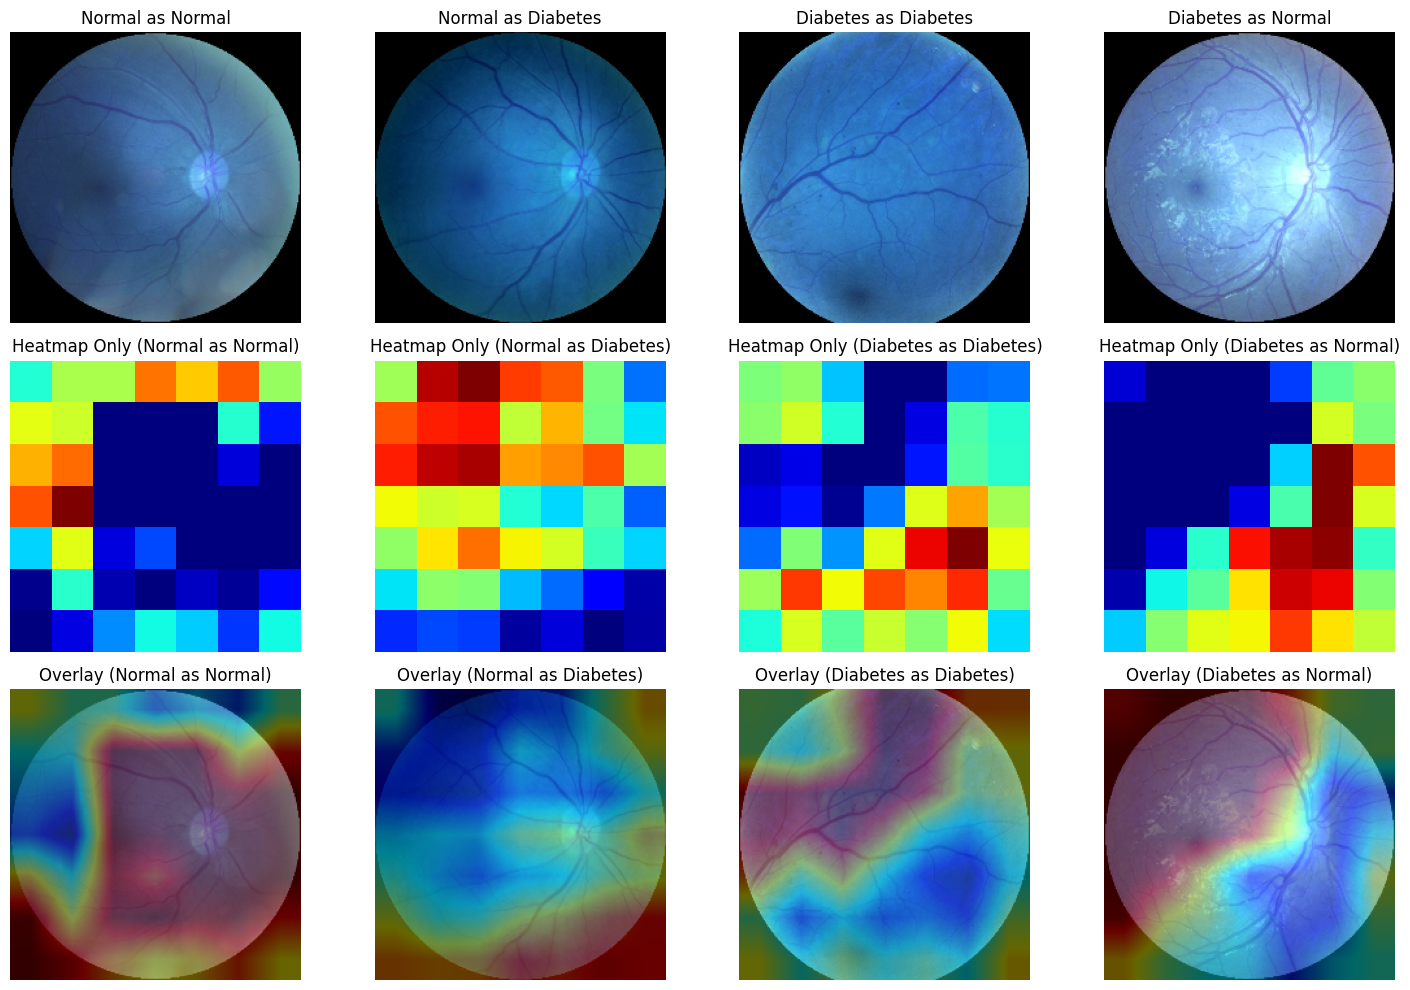

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Load the pre-trained model (assuming it's already trained as per your previous code)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.load_weights('/content/diabetic_retinopathy_model.h5')  # Update with actual path

# Define Grad-CAM function
def get_gradcam(model, img_array, last_conv_layer_name='Conv_1'):
    last_conv_layer = model.get_layer(last_conv_layer_name)
    grad_model = Model([model.inputs], [last_conv_layer.output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap, axis=-1)
    heatmap = tf.nn.relu(heatmap)
    heatmap /= tf.reduce_max(heatmap)
    return heatmap.numpy()

# Preprocess image function
def preprocess_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Overlay heatmap function
def overlay_heatmap(img, heatmap, alpha=0.4):
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img * (1 - alpha)
    return superimposed_img.astype(np.uint8)

# Paths to test images
test_dir = './dataset/test'
normal_dir = os.path.join(test_dir, 'Normal')
diabetes_dir = os.path.join(test_dir, 'Diabetes')

# Get lists of normal and diabetes images
normal_images = [(os.path.join(normal_dir, img), 0) for img in os.listdir(normal_dir)]  # Label 0 for Normal
diabetes_images = [(os.path.join(diabetes_dir, img), 1) for img in os.listdir(diabetes_dir)]  # Label 1 for Diabetes
all_images = normal_images + diabetes_images

# Predict and classify images into cases
cases = {
    "Normal as Normal": None,  # True Positive for Normal
    "Normal as Diabetes": None,  # False Positive for Diabetes
    "Diabetes as Diabetes": None,  # True Positive for Diabetes
    "Diabetes as Normal": None  # False Negative for Diabetes
}

for img_path, true_label in all_images:
    img_array = preprocess_image(img_path)
    pred_prob = model.predict(img_array)[0][0]
    pred_label = 1 if pred_prob >= 0.5 else 0  # 0 for Normal, 1 for Diabetes

    if true_label == 0 and pred_label == 0 and cases["Normal as Normal"] is None:
        cases["Normal as Normal"] = (img_path, true_label, pred_label, pred_prob)
    elif true_label == 0 and pred_label == 1 and cases["Normal as Diabetes"] is None:
        cases["Normal as Diabetes"] = (img_path, true_label, pred_label, pred_prob)
    elif true_label == 1 and pred_label == 1 and cases["Diabetes as Diabetes"] is None:
        cases["Diabetes as Diabetes"] = (img_path, true_label, pred_label, pred_prob)
    elif true_label == 1 and pred_label == 0 and cases["Diabetes as Normal"] is None:
        cases["Diabetes as Normal"] = (img_path, true_label, pred_label, pred_prob)

    # Stop once all cases are found
    if all(cases.values()):
        break

# Plot the results for each case
plt.figure(figsize=(15, 10))

for i, (case_name, data) in enumerate(cases.items(), 1):
    if data is None:
        print(f"No example found for case: {case_name}")
        continue

    img_path, true_label, pred_label, pred_prob = data
    img_array = preprocess_image(img_path)
    heatmap = get_gradcam(model, img_array, last_conv_layer_name='Conv_1')
    img_orig = cv2.imread(img_path)
    img_orig = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
    superimposed_img = overlay_heatmap(img_orig, heatmap)

    # Original Image
    plt.subplot(3, 4, i)
    plt.imshow(img_orig)
    plt.title(case_name)
    plt.axis('off')

    # Heatmap Only
    plt.subplot(3, 4, i + 4)
    plt.imshow(heatmap, cmap='jet')
    plt.title(f"Heatmap Only ({case_name})")
    plt.axis('off')

    # Overlay
    plt.subplot(3, 4, i + 8)
    plt.imshow(superimposed_img)
    plt.title(f"Overlay ({case_name})")
    plt.axis('off')

# Adjust layout and save
plt.tight_layout()
plt.savefig('gradcam_cases.png')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_1413']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


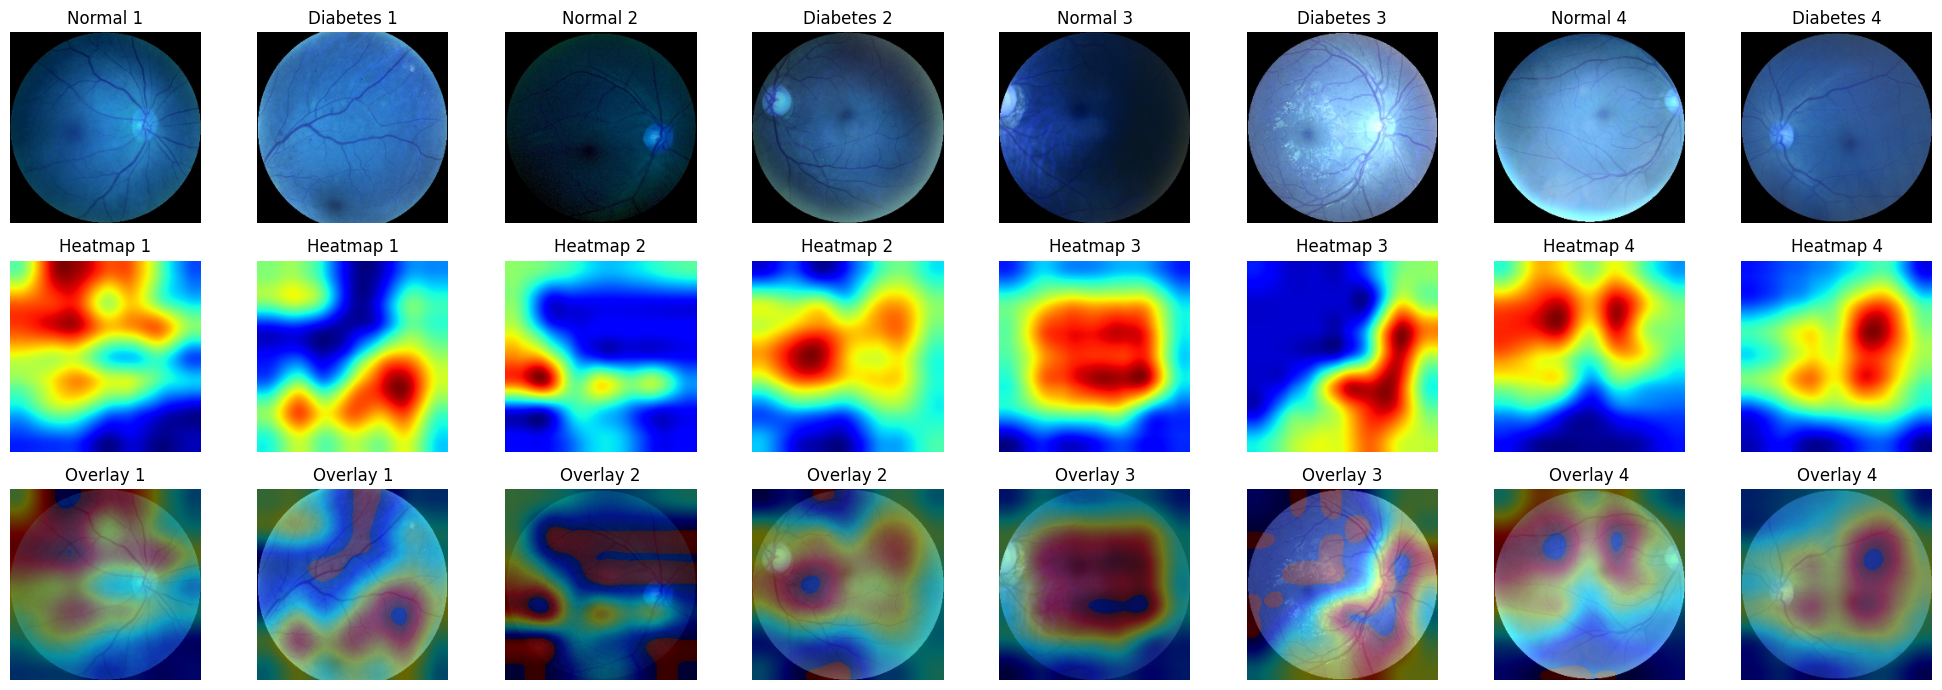

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Load the pre-trained model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.load_weights('/content/diabetic_retinopathy_model.h5')  # Update with actual path

# Define Grad-CAM function
def get_gradcam(model, img_array, last_conv_layer_name='Conv_1'):
    last_conv_layer = model.get_layer(last_conv_layer_name)
    grad_model = Model([model.inputs], [last_conv_layer.output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap, axis=-1)
    heatmap = tf.nn.relu(heatmap)
    heatmap /= tf.reduce_max(heatmap)
    return heatmap.numpy()

# Preprocess image function
def preprocess_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Overlay heatmap function with inverted colors (blue to red, red to blue)
def overlay_heatmap(img, heatmap, alpha=0.4):
    # Resize heatmap to match image dimensions (224x224)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)
    # Invert heatmap values to swap colors (low values to red, high to blue)
    heatmap_inverted = 1.0 - heatmap
    # Convert to 8-bit for colormap
    heatmap_inverted = np.uint8(255 * heatmap_inverted)
    # Apply JET colormap (now low values are red, high values are blue)
    heatmap_colored = cv2.applyColorMap(heatmap_inverted, cv2.COLORMAP_JET)
    # Overlay the heatmap on the original image
    superimposed_img = heatmap_colored * alpha + img * (1 - alpha)
    return superimposed_img.astype(np.uint8)

# Paths to test images
test_dir = './dataset/test'
normal_dir = os.path.join(test_dir, 'Normal')
diabetes_dir = os.path.join(test_dir, 'Diabetes')

# Select multiple images from each class
normal_images = [os.path.join(normal_dir, img) for img in os.listdir(normal_dir)[:4]]
diabetes_images = [os.path.join(diabetes_dir, img) for img in os.listdir(diabetes_dir)[:4]]

# Generate and plot Grad-CAM for multiple images
plt.figure(figsize=(20, 7))  # Adjusted figure size for 3x8 grid

# Process and plot images
for i, (normal_img_path, diabetes_img_path) in enumerate(zip(normal_images, diabetes_images), 1):
    # Preprocess images
    normal_img = preprocess_image(normal_img_path)
    diabetes_img = preprocess_image(diabetes_img_path)

    # Get predictions
    normal_pred_prob = model.predict(normal_img)[0][0]
    diabetes_pred_prob = model.predict(diabetes_img)[0][0]
    normal_pred_class = 'Normal' if normal_pred_prob < 0.5 else 'Diabetes'
    diabetes_pred_class = 'Normal' if diabetes_pred_prob < 0.5 else 'Diabetes'

    # Generate Grad-CAM heatmaps
    heatmap_normal = get_gradcam(model, normal_img, last_conv_layer_name='Conv_1')
    heatmap_diabetes = get_gradcam(model, diabetes_img, last_conv_layer_name='Conv_1')

    # Load original images
    normal_img_orig = cv2.imread(normal_img_path)
    diabetes_img_orig = cv2.imread(diabetes_img_path)
    normal_img_orig = cv2.cvtColor(normal_img_orig, cv2.COLOR_BGR2RGB)  # Ensure correct color conversion
    diabetes_img_orig = cv2.cvtColor(diabetes_img_orig, cv2.COLOR_BGR2RGB)

    # Overlay heatmaps with corrected colors
    superimposed_normal = overlay_heatmap(normal_img_orig, heatmap_normal)
    superimposed_diabetes = overlay_heatmap(diabetes_img_orig, heatmap_diabetes)

    # Plot Original Images
    plt.subplot(3, 8, (i-1)*2 + 1)  # Normal Original
    plt.imshow(normal_img_orig)
    plt.title(f'Normal {i}')
    plt.axis('off')

    plt.subplot(3, 8, (i-1)*2 + 2)  # Diabetes Original
    plt.imshow(diabetes_img_orig)
    plt.title(f'Diabetes {i}')
    plt.axis('off')

    # Plot Heatmaps with increased resolution (more "boxes")
    heatmap_normal_resized = cv2.resize(heatmap_normal, (224, 224), interpolation=cv2.INTER_CUBIC)  # Upsample for smoother heatmap
    heatmap_diabetes_resized = cv2.resize(heatmap_diabetes, (224, 224), interpolation=cv2.INTER_CUBIC)

    plt.subplot(3, 8, (i-1)*2 + 9)  # Normal Heatmap (2nd row)
    plt.imshow(heatmap_normal_resized, cmap='jet')
    plt.title(f'Heatmap {i}')
    plt.axis('off')

    plt.subplot(3, 8, (i-1)*2 + 10)  # Diabetes Heatmap (2nd row)
    plt.imshow(heatmap_diabetes_resized, cmap='jet')
    plt.title(f'Heatmap {i}')
    plt.axis('off')

    # Plot Overlays
    plt.subplot(3, 8, (i-1)*2 + 17)  # Normal Overlay (3rd row)
    plt.imshow(superimposed_normal)
    plt.title(f'Overlay {i}')
    plt.axis('off')

    plt.subplot(3, 8, (i-1)*2 + 18)  # Diabetes Overlay (3rd row)
    plt.imshow(superimposed_diabetes)
    plt.title(f'Overlay {i}')
    plt.axis('off')

# Adjust layout and save
plt.tight_layout()
plt.savefig('gradcam_output_updated.png')
plt.show()